# 10 Clustering
__Math 3280 - Data Mining__ : Snow College : Dr. Michael E. Olson

* Leskovec, Chapter 7
* Brunton, Chapter 5
-----

* Getting into Machine Learning - Start by looking at Clustering methods which deal with large amounts of data
* Clustering is a type of *Unsupervised* Learning
    * *Supervised*: Datapoints have labels, so are automatically grouped
    * *Unsupervised*: Datapoints are not labelled, so are not automatically grouped
* The goal of Clustering is to group unsupervised points
    * Any two points with a relatively short distance will be put into the same groups
    * Any two points with a relatively large distance will be put into different groups
* How to measure distances
    * If data is quantitative and can be put into a Euclidean space, then we can use common distance measures and calculate averages
        * Euclidean distance (2-norm)
        * Manhattan distance (1-norm)
        * $L_\infty$ distance ($\infty$-norm)
    * Modern clustering is more difficult - deal with non-Euclidean spaces. For example, the words "cat" and "cap" are very similar, but what is the average?
        * Jaccard distance
        * Cosine distance
        * Hamming distance
        * Edit distance
    * General rules for any distance measure:
        1. Distances are non-negative, and only 0 if it is the distance between a point and itself: $d(x,y) \ge 0$
        2. Distances are symmetric: $d(x,y) = d(y,x)$
        3. Triangle inequality: $d(x,y) \le d(x,z) + d(z,y)$
* 2 strategies for clustering:
    * Hierarchical - clusters based on closeness
    * Point assignment - points are put into the cluster into which it best fits
        * Allows splitting of clusters or outliers
    * Either way, points are gathered around a common __centroid__, or average of the points
* The curse of dimensionality
    1. High-dimensional data often shows all points as nearly equidistant
        * Take $x$ and $y$ as d-dimensional vectors with each component between 0 and 1
        * $\sqrt{\sum_{i=1}^d (x_i-y_i)^2}$ is the Euclidean distance between $x$ and $y$
        * for $d=1$, the average distance is 1/3
        * As $d$ increases, that value gets larger and larger
    2. High-dimensional vectors will approach being orthogonal
        * Cosine distance = $\frac{\sum_{i=1}^d x_iy_i}{\sqrt{\sum_{i=1}^d x_i^2}\sqrt{\sum_{i=1}^d y_i^2}}$
        * Denominator increases linearly in $d$
        * Values of $x_i$ and $y_i$ can be either positive or negative, so the expected value of these products (the numerator) will be centered around 0
        * The result of this quotient is a value close to 0
            * $\cos\theta = 0$, so $\theta = 90^\circ$, which means they are orthogonal
* Hierarchical Clustering
    * Questions to consider
        1. How will cluster be represented?
        2. How will we choose which two clusters to merge? (distance measure)
        3. When will we stop combining clusters?
     

-----

## The Curse of Dimensionality
1. In high dimensions, all points tend to become equidistant (equal distances apart)
2. In high dimensions, all points appear to be orthogonal

In [ ]:
# Curse #1
import numpy as np

d = 60
n = 1000
distance = np.zeros(n)

for i in range(n):
    for j in range(d):
        [x,y] = [np.random.rand(),np.random.rand()]
        distance[i] += (x-y)**2
    distance[i] = np.sqrt(distance[i])

print(np.sum(distance)/n)

In [ ]:
# Curse #2
import numpy as np

d = 2
n = 10
cosdistance = np.zeros(n)

for i in range(n):
    numerator = 0
    norm_x = 0
    norm_y = 0
    for j in range(d):
        [x,y] = [np.random.randint(-999,999),np.random.randint(-999,999)]
        numerator += x*y
        norm_x += x**2
        norm_y += y**2
    cosdistance[i] = numerator / (np.sqrt(norm_x)*np.sqrt(norm_y))

print(np.sum(cosdistance)/n)

-----
## K-Means
K-Means is a form of __point assignment__ clustering.

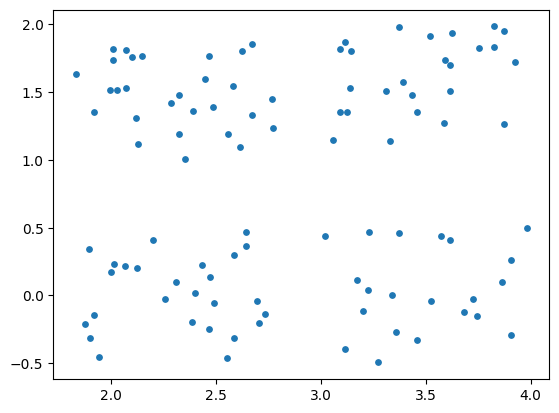

In [1]:
import numpy as np
import matplotlib.pyplot as plt

n = 100
x = np.random.rand(n) + 3 + np.random.randint(-1,1, size=n)*1.2
y = np.random.rand(n) + 1 + np.random.randint(-1,1, size=n)*1.5

plt.scatter(x,y,s=15)

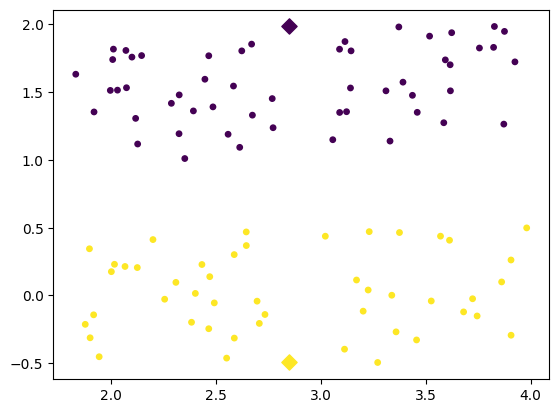

In [21]:
#####   Create centroids   #####
n_centroids = 2
centroids = np.zeros((n_centroids,2))

# ## Hierarchical selection to find starting centroids

# ## Using a random point, then finding furthest point from that, etc.
# j = np.random.randint(0,n)
# centroids = np.array([[x[j],y[j]]])

# for i in range(n_centroids-1):
#     j = np.random.randint(0,n)
#     centroids = np.vstack([centroids, [x[j],y[j]]])

# ## Using corners
# centroids[0] = [min(x),max(y)]
# centroids[1] = [max(x),max(y)]
# centroids[2] = [min(x),min(y)]
# centroids[3] = [max(x),min(y)]

## Using sides
centroids[0] = [np.mean(x),max(y)]
centroids[1] = [np.mean(x),min(y)]
# centroids[2] = [min(x),np.mean(y)]
# centroids[3] = [max(x),np.mean(y)]
# centroids[4] = [min(x),max(y)]
# centroids[5] = [max(x),max(y)]
# centroids[6] = [min(x),min(y)]
# centroids[7] = [max(x),min(y)]

#####   Assign each point to a centroid   #####
group = np.zeros_like(x)
for i in range(n):
    d_min = 99999
    for j in range(n_centroids):
        d = np.sqrt((x[i]-centroids[j,0])**2 + (y[i]-centroids[j,1])**2)
        if d < d_min:
            d_min = d
            group_num = j
    group[i] = group_num


#####   Plot with colors   ####
plt.scatter(centroids[:,0],centroids[:,1],c=[i for i in range(n_centroids)], marker='D', s=60)
plt.scatter(x,y,s=15,c=group)

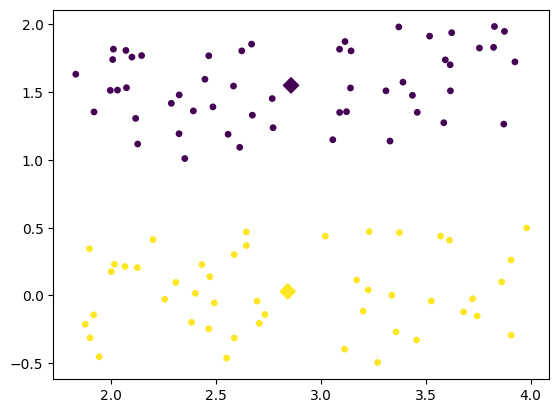

In [22]:
#####   New averages for centroids   ####
for grp in range(n_centroids):
    x_in_grp = []
    y_in_grp = []
    for i in range(n):
        if group[i] == grp:
            x_in_grp.append(x[i])
            y_in_grp.append(y[i])
    centroids[grp,0] = np.mean(x_in_grp)
    centroids[grp,1] = np.mean(y_in_grp)


#####   Plot with colors   #####
plt.scatter(centroids[:,0],centroids[:,1],c=[i for i in range(n_centroids)], marker='D', s=60)
plt.scatter(x,y,s=15,c=group)

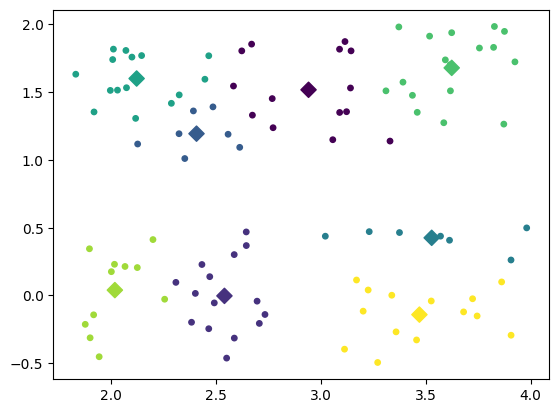

In [20]:
#####   Reassign all points   #####
group = np.zeros_like(x)
for i in range(n):
    d_min = 99999
    for j in range(n_centroids):
        d = np.sqrt((x[i]-centroids[j,0])**2 + (y[i]-centroids[j,1])**2)
        if d < d_min:
            d_min = d
            group_num = j
    group[i] = group_num
    

#####   Find new centroids   #####
for grp in range(n_centroids):
    x_in_grp = []
    y_in_grp = []
    for i in range(n):
        if group[i] == grp:
            x_in_grp.append(x[i])
            y_in_grp.append(y[i])
    centroids[grp,0] = np.mean(x_in_grp)
    centroids[grp,1] = np.mean(y_in_grp)


#####   Plot   #####
plt.scatter(centroids[:,0],centroids[:,1],c=[i for i in range(n_centroids)], marker='D', s=60)
plt.scatter(x,y,s=15,c=group)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

n = 30
df = pd.DataFrame({'x': np.random.rand(n) + 3 + np.random.randint(-1,1, size=n)*1.2,
                   'y': np.random.rand(n) + 1 + np.random.randint(-1,1, size=n)*1.5})

sns.scatterplot(data=df, x='x', y='y')

In [ ]:
centroids = pd.DataFrame({'x':[df['x'].min(), df['x'].min(), df['x'].max(), df['x'].max()],
                          'y':[df['y'].min(), df['y'].max(), df['y'].min(), df['y'].max()]})

def find_group(x,y,centers):
    d_min = 9999
    for i in range(len(centers)):
        d = np.sqrt((x-centers[i,0])**2 + (y-centers[i,1])**2)
        if d < d_min:
            d_min = d
            group = i
    return i

for i in range(n):
    df.loc[i,'group'] = find_group(df.loc[i,'x'],df.loc[i,'y'],centroids.values)

sns.scatterplot(data=df, x='x', y='y', hue='group')
sns.scatterplot(data=centroids, x='x', y='y', markers='v')